In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.linear_model import LinearRegression

importing data

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\fliprobonotes\avocado.csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


as per the above observations we can see that there are 18249 rows and 14 coloumns

EDA

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


there are 3 different types of datatypes in our dataset

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All the columns have count equal to 18249. Mean and median have high difference except for Average price stating that data has high skewness present. There is high variance in all the columns except for Average price and year column. Difference between min, max and interquartile ranges is uneven hence there are a no. of outliers present in the data.

In [7]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

There are no constant or identifier column.

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values.

In [10]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Dataframe have 3 columns with object type data, which we need to encode.

In [11]:
df.skew()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8544\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Data is higly skewed in almost all the columns.

Cleaning data

Checking unique values in region column

In [12]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Removing TotalUS as it is not required

In [15]:
df = df[df['region']!='TotalUS']

In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Check if irrelevant column Unnamed: 0 is removed 

In [17]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
df.shape

(17911, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          17911 non-null  object 
 1   AveragePrice  17911 non-null  float64
 2   Total Volume  17911 non-null  float64
 3   4046          17911 non-null  float64
 4   4225          17911 non-null  float64
 5   4770          17911 non-null  float64
 6   Total Bags    17911 non-null  float64
 7   Small Bags    17911 non-null  float64
 8   Large Bags    17911 non-null  float64
 9   XLarge Bags   17911 non-null  float64
 10  type          17911 non-null  object 
 11  year          17911 non-null  int64  
 12  region        17911 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


As per above observation date datatype is object so there is a need toconverting Date column to type Datetime for better understanding 

In [21]:
df['Date']=pd.to_datetime(df['Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          17911 non-null  datetime64[ns]
 1   AveragePrice  17911 non-null  float64       
 2   Total Volume  17911 non-null  float64       
 3   4046          17911 non-null  float64       
 4   4225          17911 non-null  float64       
 5   4770          17911 non-null  float64       
 6   Total Bags    17911 non-null  float64       
 7   Small Bags    17911 non-null  float64       
 8   Large Bags    17911 non-null  float64       
 9   XLarge Bags   17911 non-null  float64       
 10  type          17911 non-null  object        
 11  year          17911 non-null  int64         
 12  region        17911 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


Now we can see that  Date column is converted to type Datetime

Univariate Analysis

We can seprate the data in two types Catogorical and Continueous
Catogorical =  'type', 'year','region' and 
Continueous = 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


conventional    8957
organic         8954
Name: type, dtype: int64

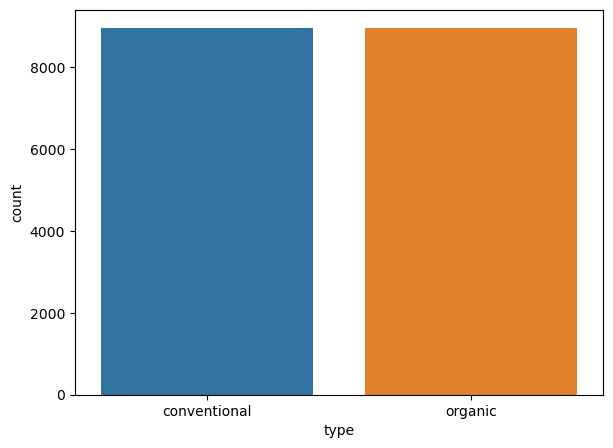

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

There two types organic and conventional are almost equal and balanced.

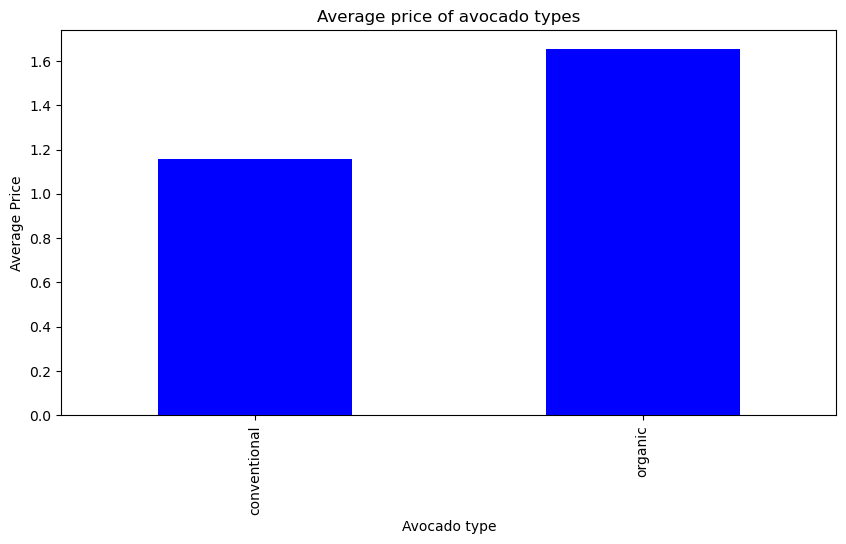

In [29]:
plt.figure(figsize=(10,5),dpi=100)
df.groupby('type').mean()['AveragePrice'].plot(kind='bar',color='blue')
plt.xlabel('Avocado type')
plt.ylabel('Average Price')
plt.title('Average price of avocado types');

Checking what is the average price of the avocado type as per the above bar chart we can see that organcic avocados have highest average price than the conventional

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2017    5616
2016    5512
2015    5511
2018    1272
Name: year, dtype: int64

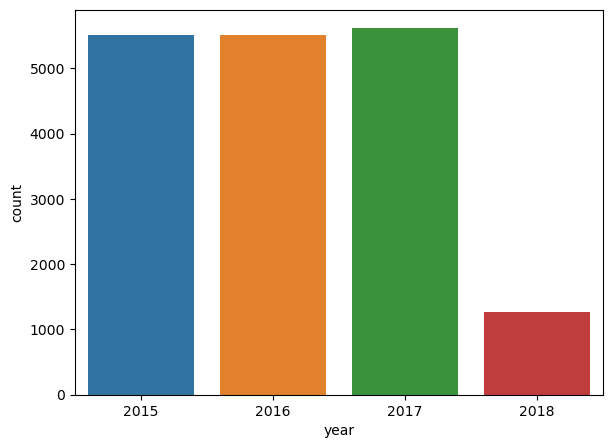

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

We have most of the data from 2015,2016,2017 and leat from 2018

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Total number of regions 53


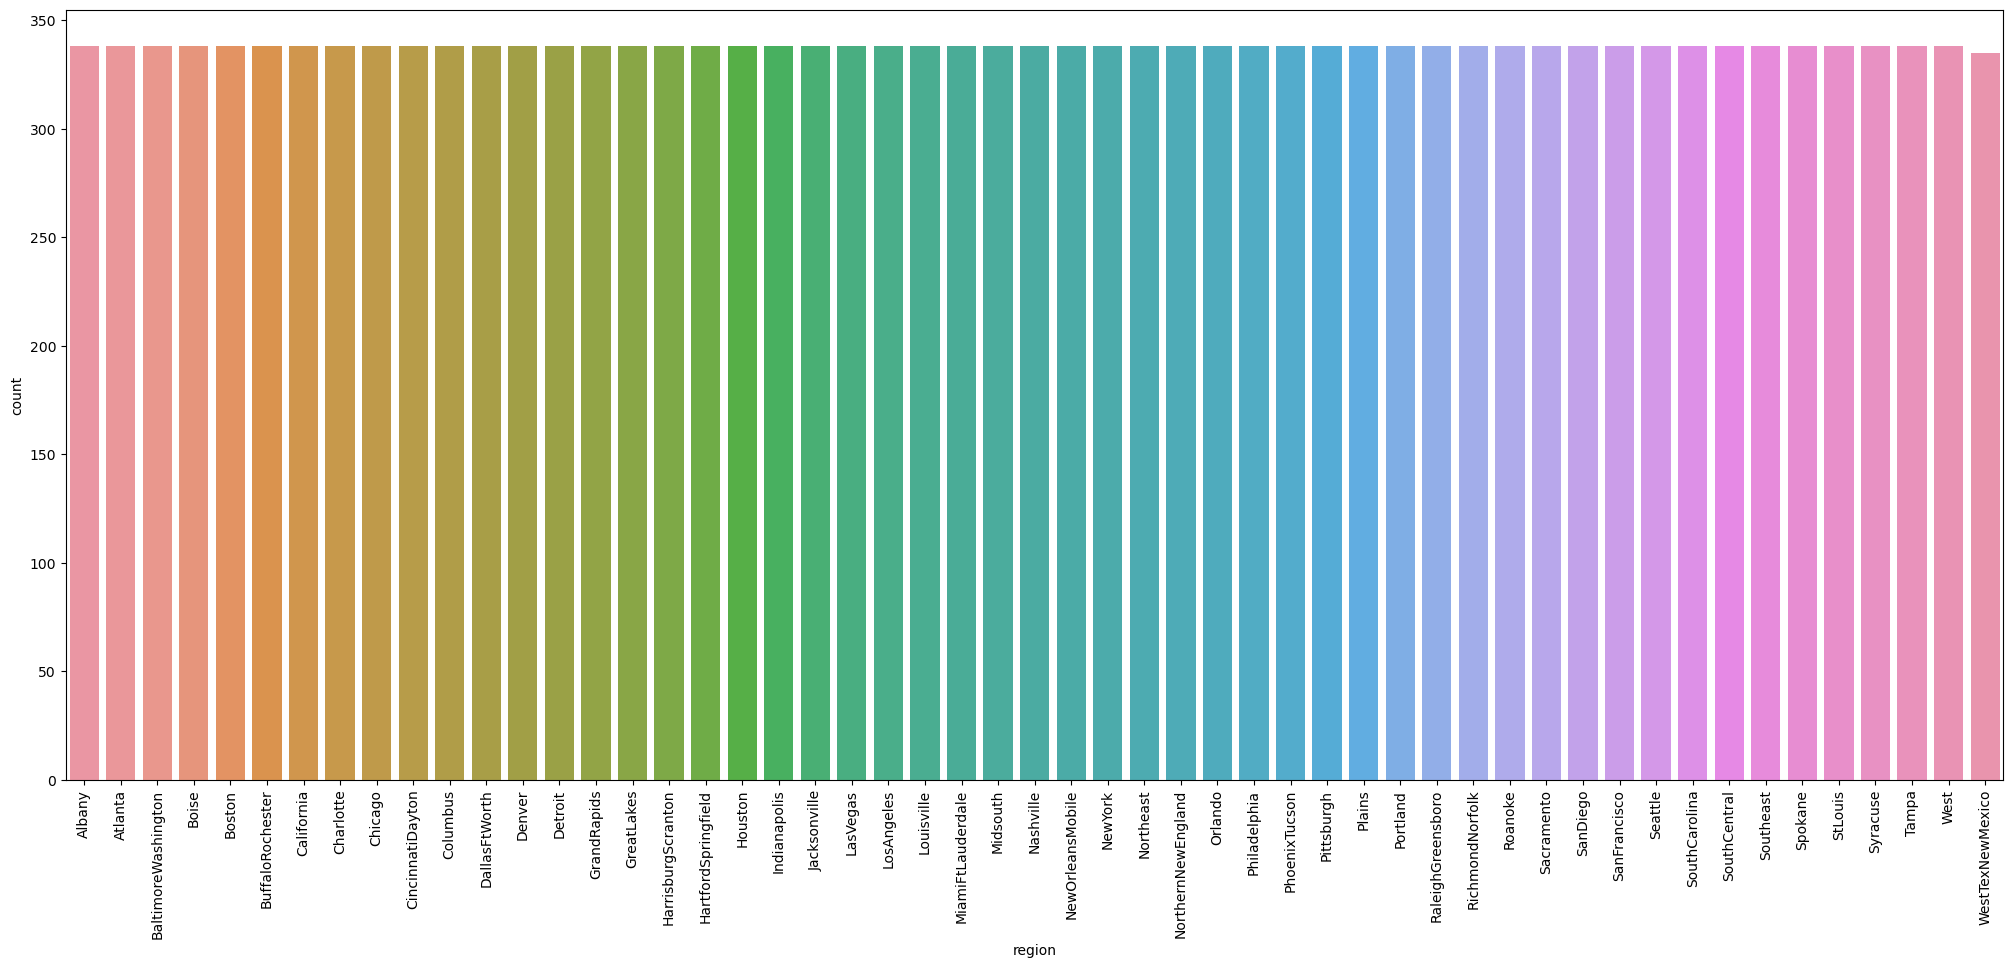

In [32]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

There are almost 52 regions where equal amout of avaocaodes are produeed and slightly less in west tex new mexico 

Using distplot to maximum and minmum price

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Minimum 0.44
Maximum 3.25


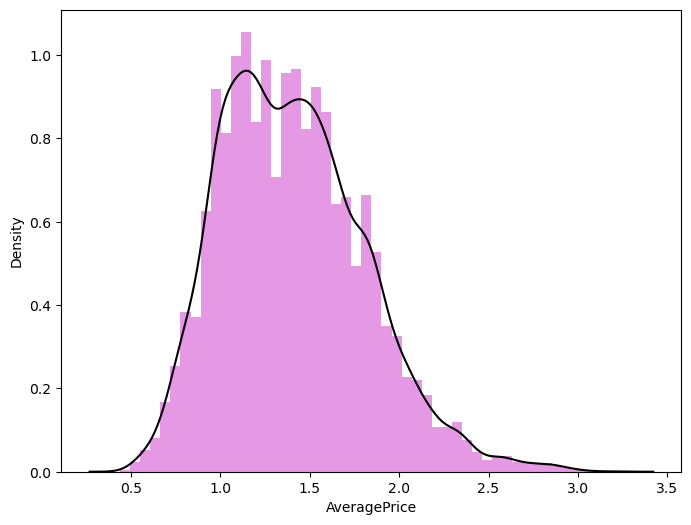

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(df['AveragePrice'],color='m', kde_kws={"color": "k"})
print('Minimum',df['AveragePrice'].min())
print('Maximum',df['AveragePrice'].max())

Average price of avacados little skewed, price ranging from 0.44 to 3.25

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Minimum 84.56
Maximum 11274749.11


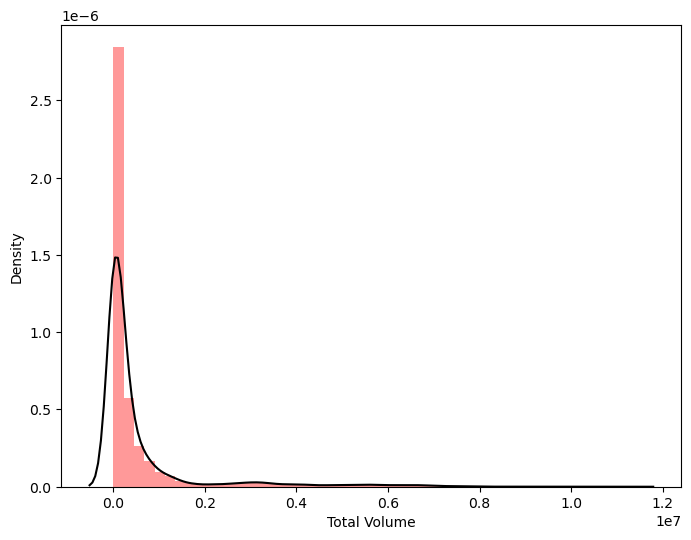

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Volume'],color='r', kde_kws={"color": "k"})
print('Minimum',df['Total Volume'].min())
print('Maximum',df['Total Volume'].max())

Most of the Total volume of Avacados is concentrated below 1e7 volumes while it goes upto 62505646.52 volumes. Data is higly skewed to the right, which needs to be taken care of ahead.

Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='region'>

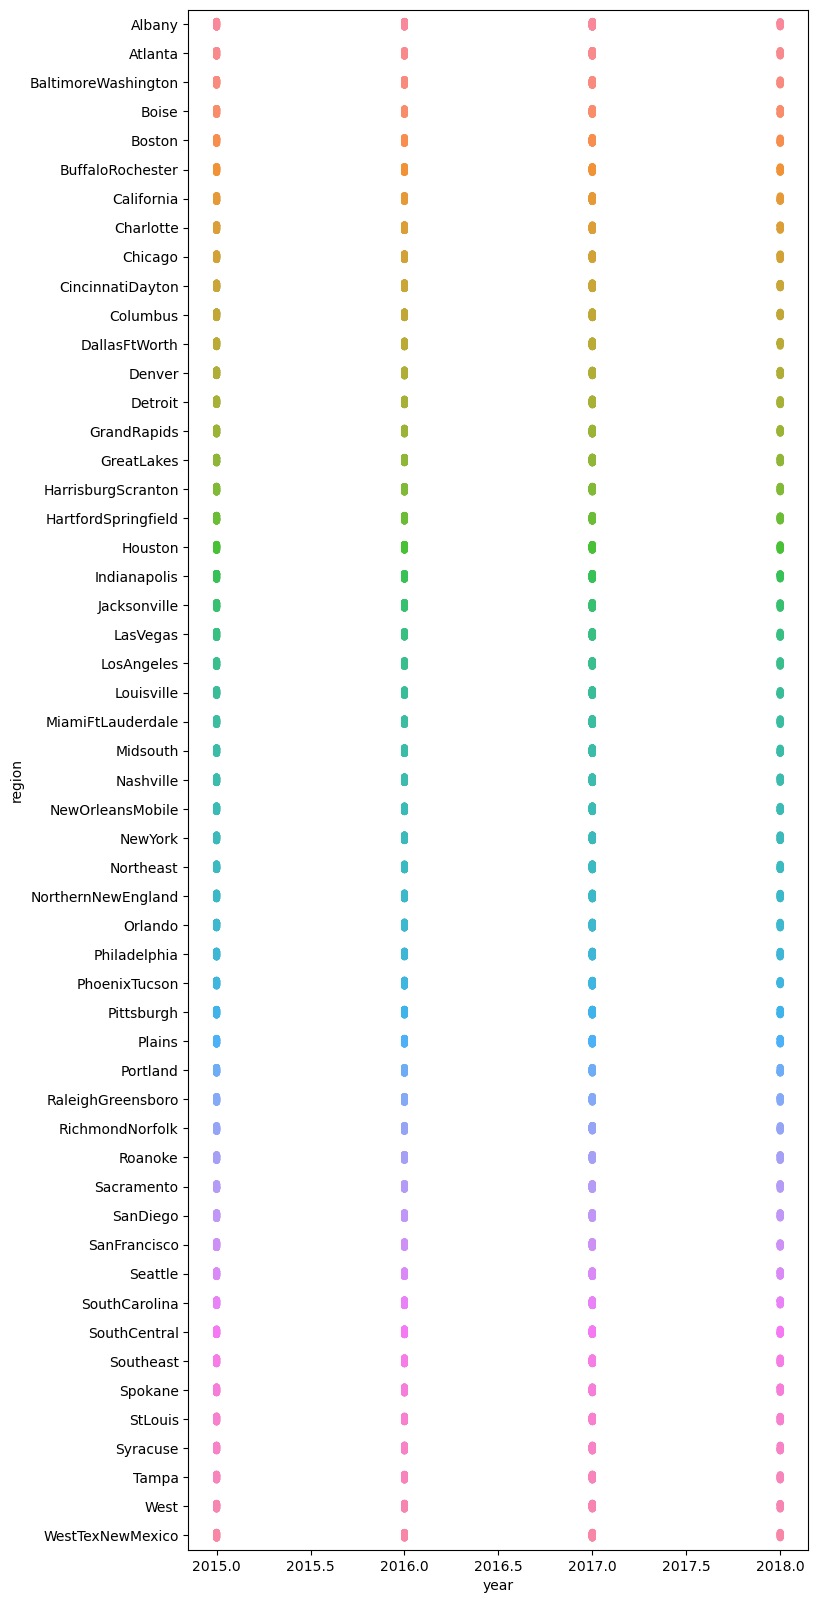

In [39]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

Avocados are collected from all the regions irrespective of the year.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

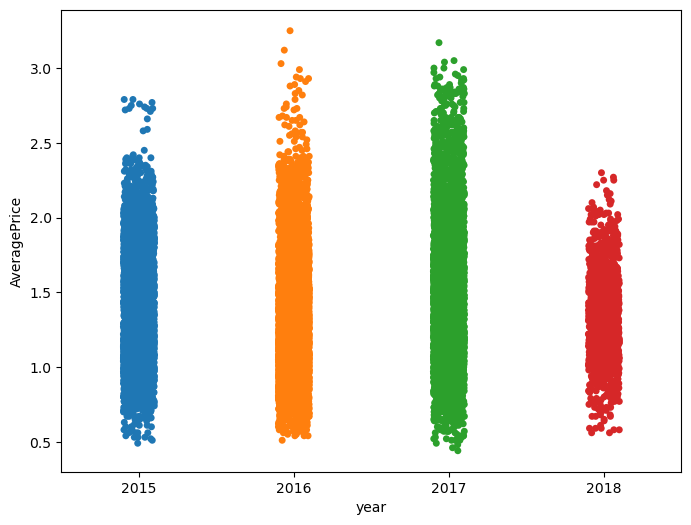

In [41]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'Midso

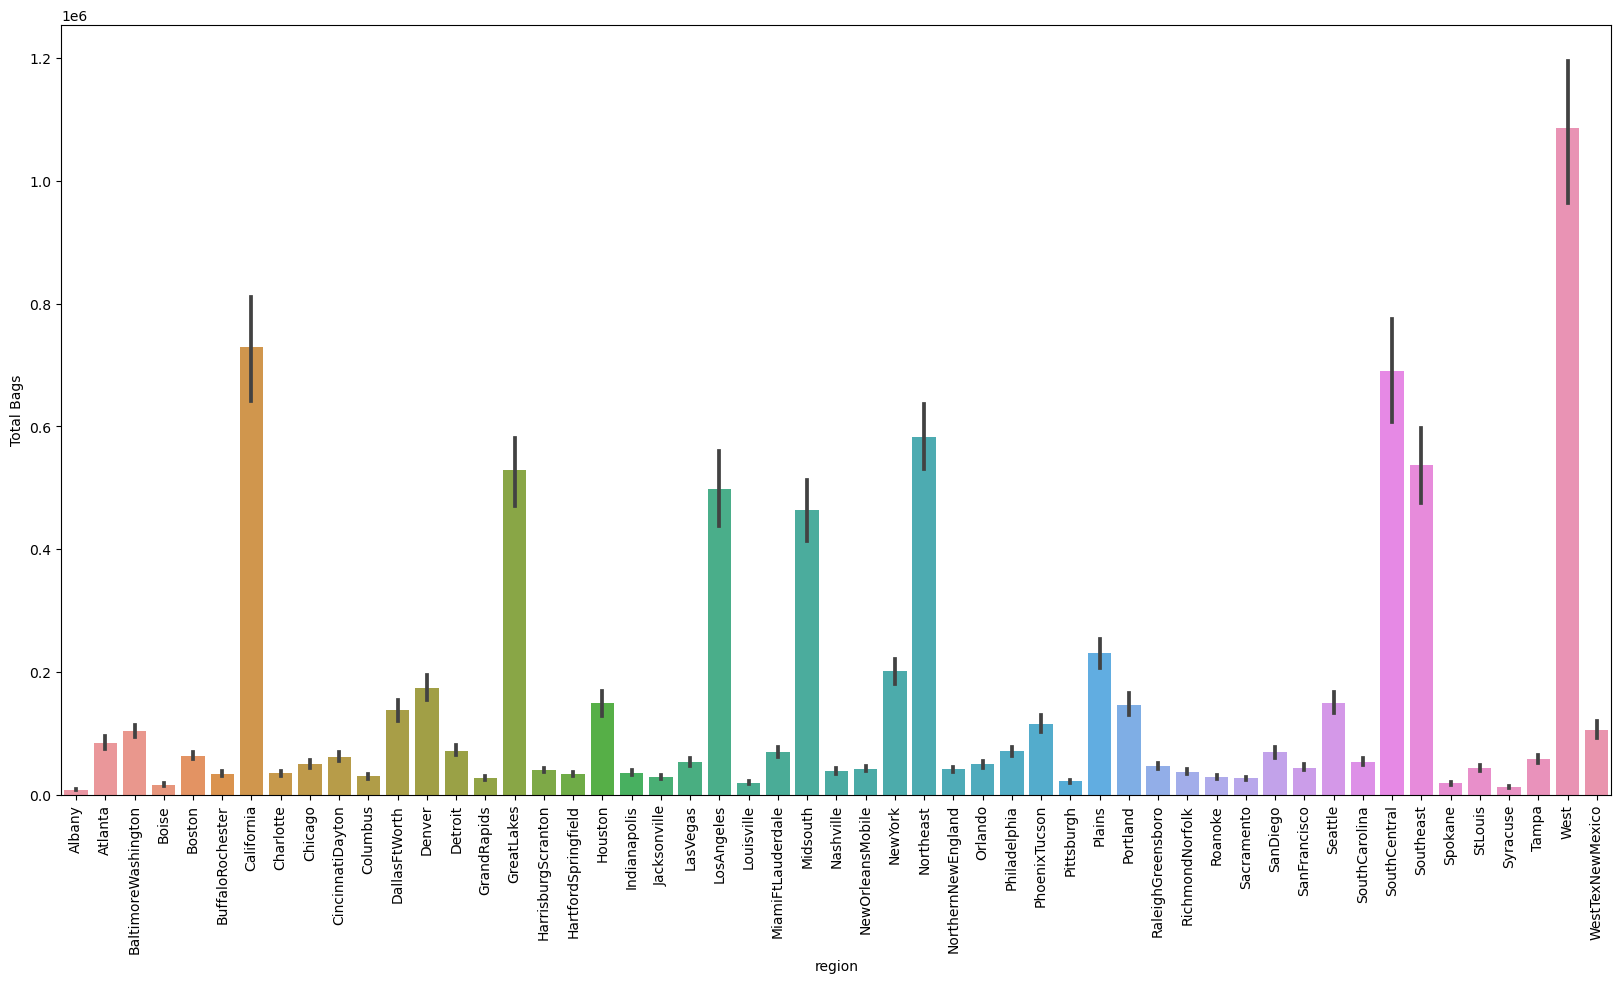

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='region',y='Total Bags',data=df)
plt.xticks(rotation=90)

The volumes of avacado increases in a region, total bags also increases to carry those avacado's.

<AxesSubplot:>

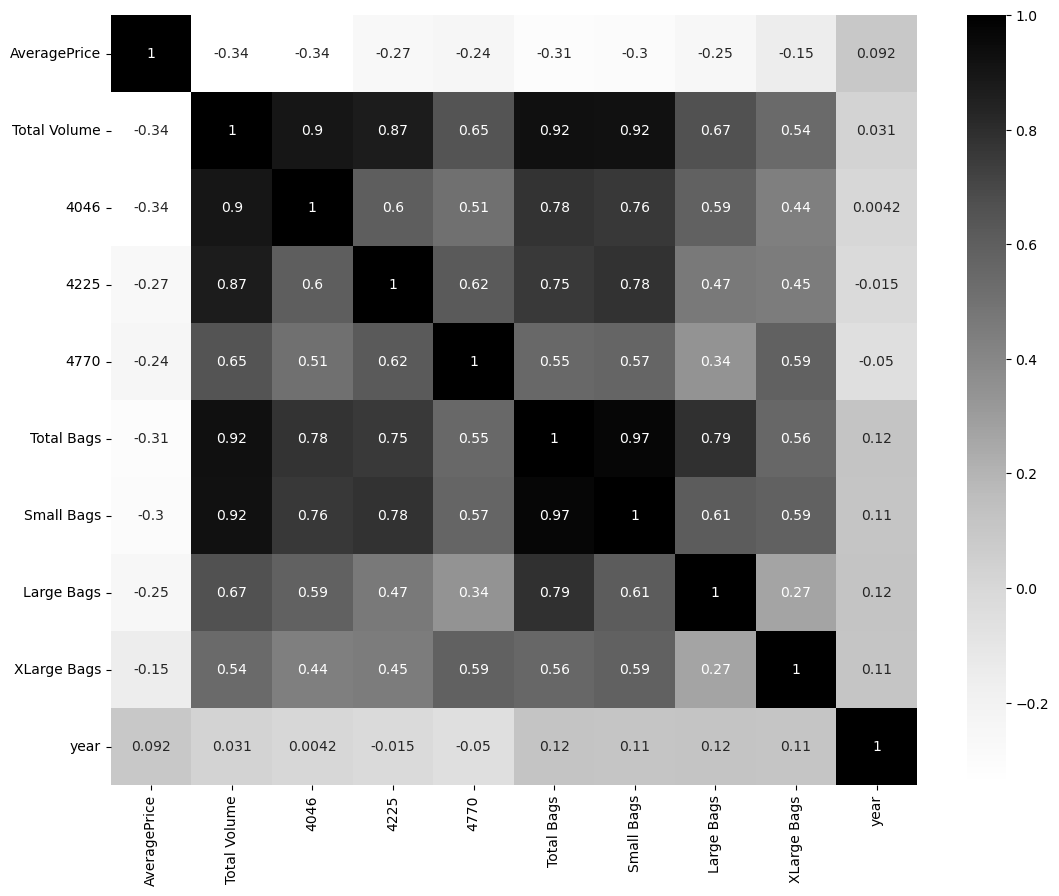

In [44]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

Average price shows positive relationship with the year column while negative correlation with all the other column. Intresting thing to notice here is that independent features show more than 90% correlation with each other. This is a case of multicollinearity. We need to remove some features to resolve this problem.

 Extracting month, day and year info from date column then dropping it.

In [45]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date',axis=1,inplace=True)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

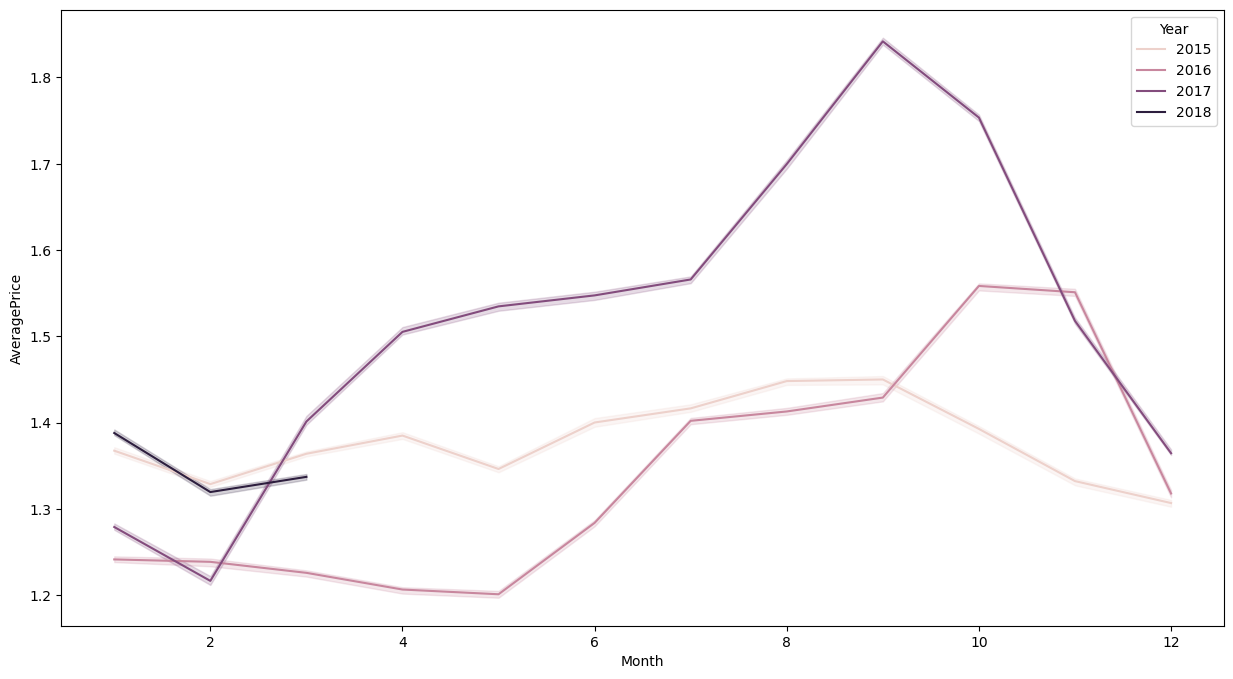

In [46]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='AveragePrice',hue='Year',ci=18,data=df)

Average price of avacado's is high in the month of September October November. As the season for avocado's is in the summer, off season fruit is expensive

Replaceing 2015 by 1 and 2016 by 2 for more simplicity

In [47]:
df['Year'].replace(2015,1,inplace=True)
df['Year'].replace(2016,2,inplace=True)
df['Year'].replace(2017,3,inplace=True)
df['Year'].replace(2018,4,inplace=True)

We created a time column using year,month and day column and then drop these 3.

In [48]:
df['Time']=(df['Year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['Year','Month','Day'],axis=1,inplace=True)

Encoding

In [49]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [50]:
df['region']=o.fit_transform(df['region'].values.reshape(-1,1))
df['type']=o.fit_transform(df['type'].values.reshape(-1,1))

Removing Outlier

In [59]:
df2 = df.drop(["type","region","year"],axis=1)
numeric_columns = df2.columns
numeric_columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'Time'],
      dtype='object')

In [60]:
def outliers_count(df):
#     df = df.iloc[:, : 8]
    out=[]
    outlier_count=0
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_thresh = q1 - (1.5 * iqr)
    upper_thresh = q3 + (1.5 * iqr)
    
    for i in df:
        if (i > upper_thresh).any() or (i < lower_thresh).any():
            out.append(i)
            outlier_count+=1
    return len(out)
    
outlier_before=[]
for col in range(9):
    outlier_before.append(outliers_count(df[numeric_columns[col]]))
    
#to create dataframe
zipped_list1 = list(zip(numeric_columns, outlier_before))  # zip the two lists together
result_list1 = [[item[0], item[1]] for item in zipped_list1]  # create a list of lists
df_before =  pd.DataFrame(result_list1, columns=["Column", "No. of outliers"])
df_before.reset_index(drop=True, inplace=True) 
df_before


,Column,No. of outliers
0,AveragePrice,193
1,Total Volume,2189
2,4046,2451
3,4225,2551
4,4770,2957
5,Total Bags,2333
6,Small Bags,2187
7,Large Bags,2630
8,XLarge Bags,3981


outlier_count()function which iterates through each column in the dataset and counts the number of outliers.

Average Price Model

In [65]:
y=df.AveragePrice
X=df[["year","type","Total Bags","Total Volume","region"]]
X

,year,type,Total Bags,Total Volume,region
0,2015,0.0,8696.87,64236.62,0.0
1,2015,0.0,9505.56,54876.98,0.0
2,2015,0.0,8145.35,118220.22,0.0
3,2015,0.0,5811.16,78992.15,0.0
4,2015,0.0,6183.95,51039.60,0.0
...,...,...,...,...,...
18244,2018,1.0,13498.67,17074.83,52.0
18245,2018,1.0,9264.84,13888.04,52.0
18246,2018,1.0,9394.11,13766.76,52.0
18247,2018,1.0,10969.54,16205.22,52.0


In [66]:
onehot = pd.get_dummies(X.type, prefix='type')
X = X.drop('type',axis = 1)
onehot_2 = pd.get_dummies(X.region, prefix='region')
X = X.drop('region',axis = 1)
# Join the encoded df
X = X.join(onehot)
X=X.join(onehot_2)
X

,year,Total Bags,Total Volume,type_0.0,type_1.0,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,...,region_43.0,region_44.0,region_45.0,region_46.0,region_47.0,region_48.0,region_49.0,region_50.0,region_51.0,region_52.0
0,2015,8696.87,64236.62,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,9505.56,54876.98,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,8145.35,118220.22,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,5811.16,78992.15,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,6183.95,51039.60,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018,13498.67,17074.83,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,2018,9264.84,13888.04,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,2018,9394.11,13766.76,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,2018,10969.54,16205.22,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Building Liner Regression model for prediction

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [70]:
X_train

,year,Total Bags,Total Volume,type_0.0,type_1.0,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,...,region_43.0,region_44.0,region_45.0,region_46.0,region_47.0,region_48.0,region_49.0,region_50.0,region_51.0,region_52.0
11041,2015,500.73,30280.67,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15982,2017,3513.04,4666.42,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13654,2016,2893.49,8076.24,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,2016,193287.82,1177309.05,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16763,2017,7050.05,10865.72,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,2015,2631.39,2738.24,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13344,2016,3838.88,3968.96,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10014,2015,125.85,1632.72,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10968,2015,9086.48,27102.70,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
lr=LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
from sklearn.metrics import r2_score 
y_predreg = lr.predict(X_test) 
print(r2_score(y_true=y_test, y_pred=y_predreg))

0.5510256273107548


In [74]:
lr.score(X_test,y_test)

0.5510256273107548